In [1]:
import numpy as np
import scipy.ndimage as nd
import matplotlib.pyplot as plt
from skimage import feature
from skimage.segmentation import watershed # for the part 2
import matplotlib.pyplot as plt

In [2]:
# filename = "./data/day09test.txt"
filename = "./data/day09a.txt"
floor_list = []
with open(filename, 'r') as ff:
    line = ff.readline()
    while line:
        floor_list.append([int(n) for n in line[:-1]]) # it seems to read the newline character?!
        line = ff.readline()
floor = np.array(floor_list)

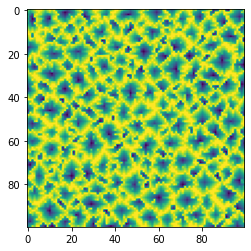

In [3]:
plt.imshow(floor);
# plt.imshow(peaks_mask);

In [4]:
footprint = np.zeros((3, 3))
footprint[[0, 1, 1, 1, 2], [1, 0, 1, 2, 1]] = 1
peaks_mask = feature.peak_local_max(9-floor, exclude_border=False, indices=False, footprint=footprint)

np.sum(1+floor[peaks_mask])

<ipython-input-4-938bebab73f1>:3: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  peaks_mask = feature.peak_local_max(9-floor, exclude_border=False, indices=False, footprint=footprint)


550

## part 2

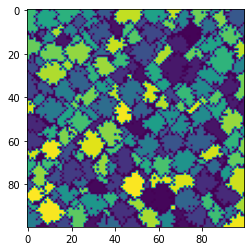

In [5]:
markers, n = nd.label(peaks_mask)
markers[markers>0] = np.random.permutation(np.arange(1, n+1))
labels = watershed(9-floor, markers, mask=floor<9)

plt.imshow(labels);

In [6]:
velicine = []
for mark in markers[peaks_mask]:
    if mark > 0:
        velicine.append(np.sum(labels == mark))
basin_sizes = np.array(velicine)

np.prod(np.sort(basin_sizes)[-3:])

1100682